Introduce la temperatura inicial en grados celcius:  50
Introduce la constante de enfriamiento:  0.02
Introduce la temperatura ambiente en grados celcius:  24


         Tiempo  Temperatura_C  Temperatura_K  Temperatura_F
0       0.00000      50.000000     323.150000     122.000000
1       0.10005      49.948026     323.098026     121.906447
2       0.20010      49.896156     323.046156     121.813081
3       0.30015      49.844389     322.994389     121.719901
4       0.40020      49.792726     322.942726     121.626908
...         ...            ...            ...            ...
1995  199.59980      24.480033     297.630033      76.064060
1996  199.69985      24.479074     297.629074      76.062333
1997  199.79990      24.478116     297.628116      76.060609
1998  199.89995      24.477160     297.627160      76.058889
1999  200.00000      24.476207     297.626207      76.057172

[2000 rows x 4 columns]
La temperatura de equilibrio es: 24.00°C, 297.15K, 75.20°F


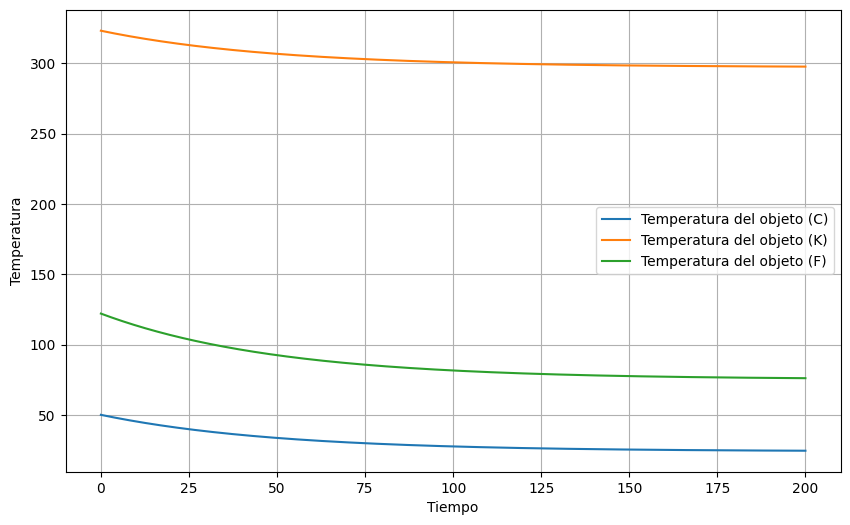

In [4]:
"ley de enfriamiento de newton"


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sympy import symbols, Eq, solve

class ObjetoEnfriamiento:
    def __init__(self, T0, k, TA):
        self.T0 = T0
        self.k = k
        self.TA = TA
        self.t = np.linspace(0, 200, 2000)
        self.T = np.zeros_like(self.t)
        self.T[0] = T0

    
    def newton(self, T, t):
        return -self.k * (T - self.TA)

    
    def resolver(self):
        self.T = odeint(self.newton, self.T0, self.t).ravel()
        self.df = pd.DataFrame({
            'Tiempo': self.t,
            'Temperatura_C': self.T,
            'Temperatura_K': list(map(lambda x: x + 273.15, self.T)),
            'Temperatura_F': list(map(lambda x: x * 9/5 + 32, self.T))
    })
        return self.df



while True:
    try:
        T0 = float(input("Introduce la temperatura inicial en grados celcius: "))
        break
    except ValueError:
        print("Error: Debes introducir un número. Inténtalo de nuevo.")

while True:
    try:
        k = float(input("Introduce la constante de enfriamiento: "))
        break
    except ValueError:
        print("Error: Debes introducir un número. Inténtalo de nuevo.")

while True:
    try:
        TA = float(input("Introduce la temperatura ambiente en grados celcius: "))
        break
    except ValueError:
        print("Error: Debes introducir un número. Inténtalo de nuevo.")


obj = ObjetoEnfriamiento(T0=T0, k=k, TA=TA)


df = obj.resolver()


df.to_csv('temperaturas.csv', index=False)

print(df)



T = symbols('T')
eq = Eq(-obj.k * (T - obj.TA), 0)
T_eq = solve(eq, T)[0]



T_eq_C = round(T_eq, 2)
T_eq_K = round(T_eq + 273.15, 2)
T_eq_F = round(T_eq * 9/5 + 32, 2)

print(f'La temperatura de equilibrio es: {T_eq_C:.2f}°C, {T_eq_K:.2f}K, {T_eq_F:.2f}°F')



plt.figure(figsize=(10, 6))
plt.plot(df['Tiempo'], df['Temperatura_C'], label='Temperatura del objeto (C)')
plt.plot(df['Tiempo'], df['Temperatura_K'], label='Temperatura del objeto (K)')
plt.plot(df['Tiempo'], df['Temperatura_F'], label='Temperatura del objeto (F)')
plt.xlabel('Tiempo')
plt.ylabel('Temperatura')
plt.legend()
plt.grid(True)



plt.savefig('temperaturas.png')
plt.show()
